- 给定model和结构，输出费米能级
  - 通过实例化ElecStruCal类，指定kmesh，以计算Au primitive cell的费米能级

In [9]:
from dptb.postprocess.elec_struc_cal import ElecStruCal

# from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model
import numpy as np
from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="nnsk.best.pth")
AtomicData_options={
        "pbc": True
    }


results_path = "./band_plot"        
stru_data = "PRIMCELL.vasp"

log_path = results_path+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

AtomicData_options = AtomicData_options
nel_atom = {"Au":11}

elec_cal = ElecStruCal(model=model,
            device='cpu')


_, efermi_FD =elec_cal.get_fermi_level(data=stru_data, 
                nel_atom = nel_atom,
               meshgrid=[30,30,30],
               AtomicData_options=AtomicData_options,
               smearing_method='FD',
               temp=300.0)

_, efermi_Gaussian =elec_cal.get_fermi_level(data=stru_data, 
                nel_atom = nel_atom,
               meshgrid=[30,30,30],
               AtomicData_options=AtomicData_options,
               smearing_method='Gaussian',
               temp=300.0)

print("Fermi level from FD method: ", efermi_FD)    
print("Fermi level from Gaussian method: ", efermi_Gaussian)


DEEPTB INFO    KPOINTS  kmesh sampling: 14806 kpoints
DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
/opt/mamba/envs/deeptb-dev/lib/python3.10/site-packages/dptb/postprocess/elec_struc_cal.py:338: RuntimeWarning: overflow encountered in expm1
  return 1.0 / (np.expm1((E - mu) / kT) + 2.0)
DEEPTB WARNING Fermi level bisection did not converge under tolerance 1e-10 after 56 iterations.
DEEPTB INFO    q_cal: 10.999999962227331, total_electrons: 11.0, diff q: 3.777266854854133e-08
DEEPTB INFO    Estimated E_fermi: -3.2257686853408813 based on the valence electrons setting nel_atom : {'Au': 11} .
DEEPTB INFO    KPOINTS  kmesh sampling: 14806 kpoints
DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB WARNING Fermi level bisection did not converge under tolerance 1e-10 after 57 iterations.
DEEPTB INFO    q_cal: 10.999999969788725, total_ele

Fermi level from FD method:  -3.2257686853408813
Fermi level from Gaussian method:  -3.2267462015151978


- 此外，我们可以得到指定k点的eigenvalues

In [10]:
from dptb.data import AtomicData, AtomicDataDict
import numpy as np
klist = np.array([[0., 0., 0.], [0.5, 0.5, 0.5]])   
_,eigs = elec_cal.get_eigs(
    data=stru_data,
    klist=klist,
    AtomicData_options=AtomicData_options
)

eigs


array([[-12.897305  ,  -7.936909  ,  -7.9369087 ,  -7.9369063 ,
         -6.3757668 ,  -6.375759  ,  29.164629  ,  29.164644  ,
         29.164665  ],
       [-10.5886135 ,  -7.9998755 ,  -7.9998746 ,  -5.1807814 ,
         -5.1807795 ,  -3.8401258 ,   0.23953104,   6.4446197 ,
          6.444622  ]], dtype=float32)

- 同时可以指定klist以计算费米能级
  - 以Si bulk为例

In [11]:
from dptb.data import AtomicData, AtomicDataDict
import numpy as np
from dptb.postprocess.elec_struc_cal import ElecStruCal
# from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model
from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="../silicon/ref_ckpts/mix/checkpoint/mix.iter200.pth")
AtomicData_options={
        "r_max": 5.50,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }


results_path = "./band_plot"        
stru_data = "../silicon/data/silicon.vasp"

log_path = results_path+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

AtomicData_options = AtomicData_options
# nel_atom = {"Au":11}
nel_atom = {'Si':4}



klist =  np.load('../silicon/data/kpath.0/kpoints.npy')
elec_cal = ElecStruCal(model=model,
            device='cpu')
data, efermi = elec_cal.get_fermi_level(data=stru_data, 
                nel_atom = nel_atom,
               klist=klist,
               AtomicData_options=AtomicData_options)





DEEPTB INFO    The ['hopping_param', 'strain_param'] are frozen!
DEEPTB INFO    KPOINTS  klist: 302 kpoints
DEEPTB WARNING Overwrite the r_max setting in the model with the r_max setting in the AtomicData_options: 5.5
DEEPTB WARNING This is very dangerous, please make sure you know what you are doing.
DEEPTB WARNING Overwrite the oer_max setting in the model with the oer_max setting in the AtomicData_options: 2.5
DEEPTB WARNING This is very dangerous, please make sure you know what you are doing.


DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Fermi energy converged after 20 iterations.
DEEPTB INFO    q_cal: 8.000000000059634, total_electrons: 8.0, diff q: 5.963407545550581e-11
DEEPTB INFO    Estimated E_fermi: -8.667020025527966 based on the valence electrons setting nel_atom : {'Si': 4} .


- 计算费米能级的方法已经内置在get_bands中
  - get_bands会利用klist作为k点调用get_fermi_level以获得费米能级

DEEPTB INFO    The ['hopping_param', 'strain_param'] are frozen!


DEEPTB WARNING Overwrite the r_max setting in the model with the r_max setting in the AtomicData_options: 5.5
DEEPTB WARNING This is very dangerous, please make sure you know what you are doing.
DEEPTB WARNING Overwrite the oer_max setting in the model with the oer_max setting in the AtomicData_options: 2.5
DEEPTB WARNING This is very dangerous, please make sure you know what you are doing.
DEEPTB INFO    KPOINTS  klist: 302 kpoints
DEEPTB INFO    The eigenvalues are already in data. will use them.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Fermi energy converged after 20 iterations.
DEEPTB INFO    q_cal: 8.000000000059634, total_electrons: 8.0, diff q: 5.963407545550581e-11
DEEPTB INFO    Estimated E_fermi: -8.667020025527966 based on the valence electrons setting nel_atom : {'Si': 4} .
DEEPTB INFO    The fermi energy is not provided, use the estimated value in line-mode: -8.667020025527966


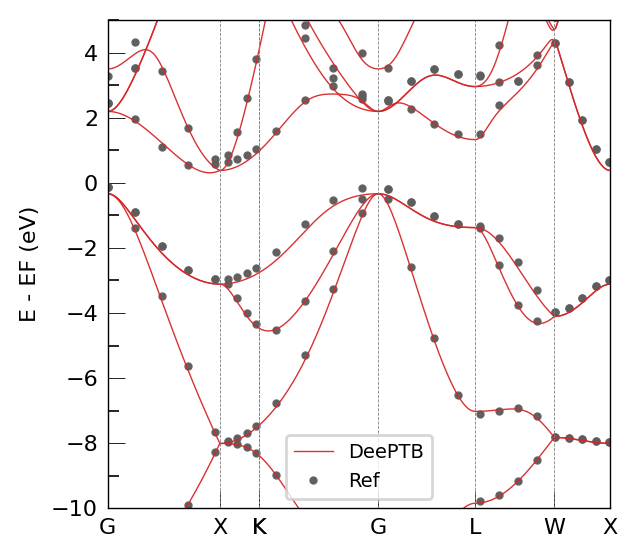

In [12]:
# band plot
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model

from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="../silicon/ref_ckpts/mix/checkpoint/mix.iter200.pth")
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0.0000000000,  0.0000000000,   0.0000000000,   50],   
                [0.5000000000,   0.0000000000,   0.5000000000,   50],               
                [0.6250000000,   0.2500000000,   0.6250000000,   1],    
                [0.3750000000,   0.3750000000,   0.7500000000,   50],     
                [0.0000000000,   0.0000000000,   0.0000000000,   50],    
                [0.5000000000,   0.5000000000,   0.5000000000,   50],                
                [0.5000000000,   0.2500000000,   0.7500000000,   50],               
                [0.5000000000,   0.0000000000,   0.5000000000,   1 ]
                ],
        "klabels":["G","X","X/U","K","G","L","W","X"],
        "nel_atom": {"Si":4},
        "emin":-10,
        "emax":5,
        "ref_band": "../silicon/data/kpath.0/eigenvalues.npy"
    }
AtomicData_options={
        "r_max": 5.50,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "../silicon/data/silicon.vasp"
AtomicData_options = AtomicData_options


log_path = results_path+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])

- 运用klist得到的费米能级有些情况下是不准确的，如在Au primitive cell体系中用klist计算费米能级（如下所示）

DEEPTB INFO    KPOINTS  klist: 1201 kpoints
DEEPTB INFO    The eigenvalues are already in data. will use them.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
/opt/mamba/envs/deeptb-dev/lib/python3.10/site-packages/dptb/postprocess/elec_struc_cal.py:338: RuntimeWarning: overflow encountered in expm1
  return 1.0 / (np.expm1((E - mu) / kT) + 2.0)
DEEPTB INFO    Fermi energy converged after 31 iterations.
DEEPTB INFO    q_cal: 11.000000000075115, total_electrons: 11.0, diff q: 7.511502531087899e-11
DEEPTB INFO    Estimated E_fermi: 0.0924344336669682 based on the valence electrons setting nel_atom : {'Au': 11} .
DEEPTB INFO    The fermi energy is not provided, use the estimated value in line-mode: 0.0924344336669682


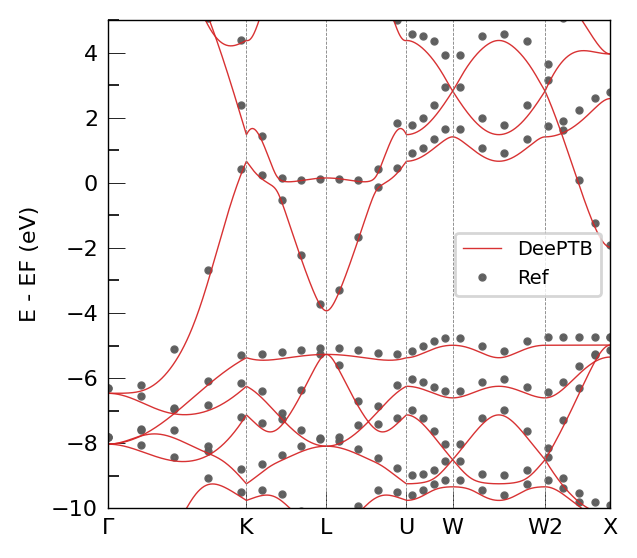

In [13]:
# band plot
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model

from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="nnsk.best.pth")
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0., 0.,0,200], 
                [0.3750000000,	0.3750000000,	0.7500000000,200],
                [0.5000000000,	0.5000000000,	0.5000000000,200], 
                [0.6250000000,	0.2500000000,	0.6250000000,200],
                [0.5000000000,	0.2500000000,	0.7500000000,200],
                [0.7500000000,	0.2500000000,	0.5000000000,200],
                [0.5000000000,	0.0000000000,	0.5000000000,1]],
        "klabels":[r'$\Gamma$', 'K', 'L', 'U','W', 'W2', 'X'],
        "nel_atom": {"Au":11},
        "emin":-10,
        "emax":5,
        "ref_band": "./Au_eigenvalues.npy"
    }
AtomicData_options={
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "PRIMCELL.vasp"
AtomicData_options = AtomicData_options
bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])

- 以下为SIESTA在Au Primitive Cell上计算得到的能带和费米能级（Extracted by sisl package）
![jupyter](./siesta_band_plot.png)

- 而采用kmesh计算得到的fermi_level作为输入，可以得到与SIESTA计算输出相同的结果

DEEPTB INFO    KPOINTS  klist: 1201 kpoints
DEEPTB INFO    The eigenvalues are already in data. will use them.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
/opt/mamba/envs/deeptb-dev/lib/python3.10/site-packages/dptb/postprocess/elec_struc_cal.py:338: RuntimeWarning: overflow encountered in expm1
  return 1.0 / (np.expm1((E - mu) / kT) + 2.0)
DEEPTB INFO    Fermi energy converged after 31 iterations.
DEEPTB INFO    q_cal: 11.000000000075115, total_electrons: 11.0, diff q: 7.511502531087899e-11
DEEPTB INFO    Estimated E_fermi: 0.0924344336669682 based on the valence electrons setting nel_atom : {'Au': 11} .
DEEPTB INFO    use input fermi energy: -3.2257686853408813, While the estimated value in line-mode is 0.0924344336669682


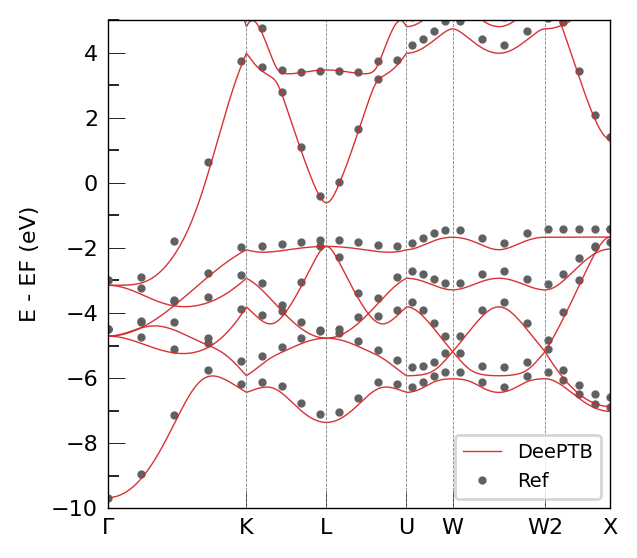

In [ ]:
# band plot
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0., 0.,0,200], 
                [0.3750000000,	0.3750000000,	0.7500000000,200],
                [0.5000000000,	0.5000000000,	0.5000000000,200], 
                [0.6250000000,	0.2500000000,	0.6250000000,200],
                [0.5000000000,	0.2500000000,	0.7500000000,200],
                [0.7500000000,	0.2500000000,	0.5000000000,200],
                [0.5000000000,	0.0000000000,	0.5000000000,1]],
        "klabels":[r'$\Gamma$', 'K', 'L', 'U','W', 'W2', 'X'],
        "nel_atom":{"Au":11},
        "E_fermi":None,
        "emin":-10,
        "emax":5,
        "ref_band": "./Au_eigenvalues.npy"
    }
task_options["E_fermi"] = efermi_FD # Fermi level from FD method as input
AtomicData_options={
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "PRIMCELL.vasp"
AtomicData_options = AtomicData_options
bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = kpath_kwargs["E_fermi"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])